In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn import linear_model
random_state = 94922767

In [ ]:
url = "/content/regression_example.csv"

In [ ]:
df0 = pd.read_csv(url)

In [ ]:
df0.head()

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
0,0,1.509081,-1.049118,1.978885,1.060733,NaN,0.824655,0.819409,-1.157708,214.593802
1,1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189


In [ ]:
df0.describe(include="all")

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
count,843.000000,802.000000,807.000000,812.000000,8.020000e+02,805.000000,808.000000,806.000000,812.000000,813.000000
mean,421.000000,-0.037473,0.008466,-0.059965,9.616777e-01,-0.093113,0.034653,-0.019928,-0.034976,3.798356
std,243.497433,1.038115,0.973884,0.991280,1.286476e+00,1.050385,0.957238,0.997345,0.963010,114.189124
min,0.000000,-3.700229,-2.832440,-4.141473,2.007427e-08,-4.072767,-2.968219,-2.850505,-3.948627,-358.659591
25%,210.500000,-0.723630,-0.640017,-0.681924,8.725649e-02,-0.802553,-0.625219,-0.689671,-0.662887,-73.823652
50%,421.000000,-0.032953,0.005693,-0.050789,4.707895e-01,-0.090512,0.051123,-0.014592,-0.049392,-0.159154
75%,631.500000,0.629368,0.681480,0.587393,1.350123e+00,0.611545,0.689203,0.612939,0.614423,75.487094
max,842.000000,3.043062,2.945731,2.925432,9.200073e+00,3.024952,3.210373,2.861549,3.000174,422.794685


In [ ]:
df0.shape

(843, 10)

In [ ]:
df0.shape[0] - df0.dropna().shape[0]

273

In [ ]:
df = df0.drop('idx' , axis = 1).dropna().copy()

In [ ]:
df.head()

,F0,F1,F2,F3,F4,F5,F6,F7,response
1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189
5,-0.635465,-1.112850,-0.330580,6.141348,1.914527,0.408895,-0.364722,-0.731382,-261.116572


In [ ]:
df.describe(include = "all")

,F0,F1,F2,F3,F4,F5,F6,F7,response
count,570.000000,570.000000,570.000000,5.700000e+02,570.000000,570.000000,570.000000,570.000000,570.000000
mean,-0.021285,0.022035,-0.092971,9.437022e-01,-0.092569,0.070721,-0.018369,-0.009618,2.207191
std,1.056384,0.992666,0.990697,1.296685e+00,1.071491,0.973972,1.010638,0.961072,113.938497
min,-3.271229,-2.832440,-4.141473,2.007427e-08,-4.072767,-2.968219,-2.687516,-2.773158,-318.105611
25%,-0.735660,-0.617422,-0.697073,9.000558e-02,-0.789596,-0.585211,-0.690098,-0.640285,-73.510375
50%,-0.009715,0.033232,-0.082978,4.626319e-01,-0.099779,0.096024,-0.009963,-0.057067,-3.669460
75%,0.665631,0.701594,0.508181,1.276793e+00,0.612308,0.710788,0.638996,0.655179,74.181279
max,3.043062,2.378251,2.925432,9.200073e+00,3.024952,2.970807,2.719574,3.000174,422.794685


In [ ]:
df.shape

(570, 9)

In [ ]:
print("the final elements of the dataset are {} rows and {} columns".format(df.shape[0], df.shape[1]))

the final elements of the dataset are 570 rows and 9 columns


In [ ]:
target = 'response'

In [ ]:
x = df.drop(target, axis =1)
y = df[target]

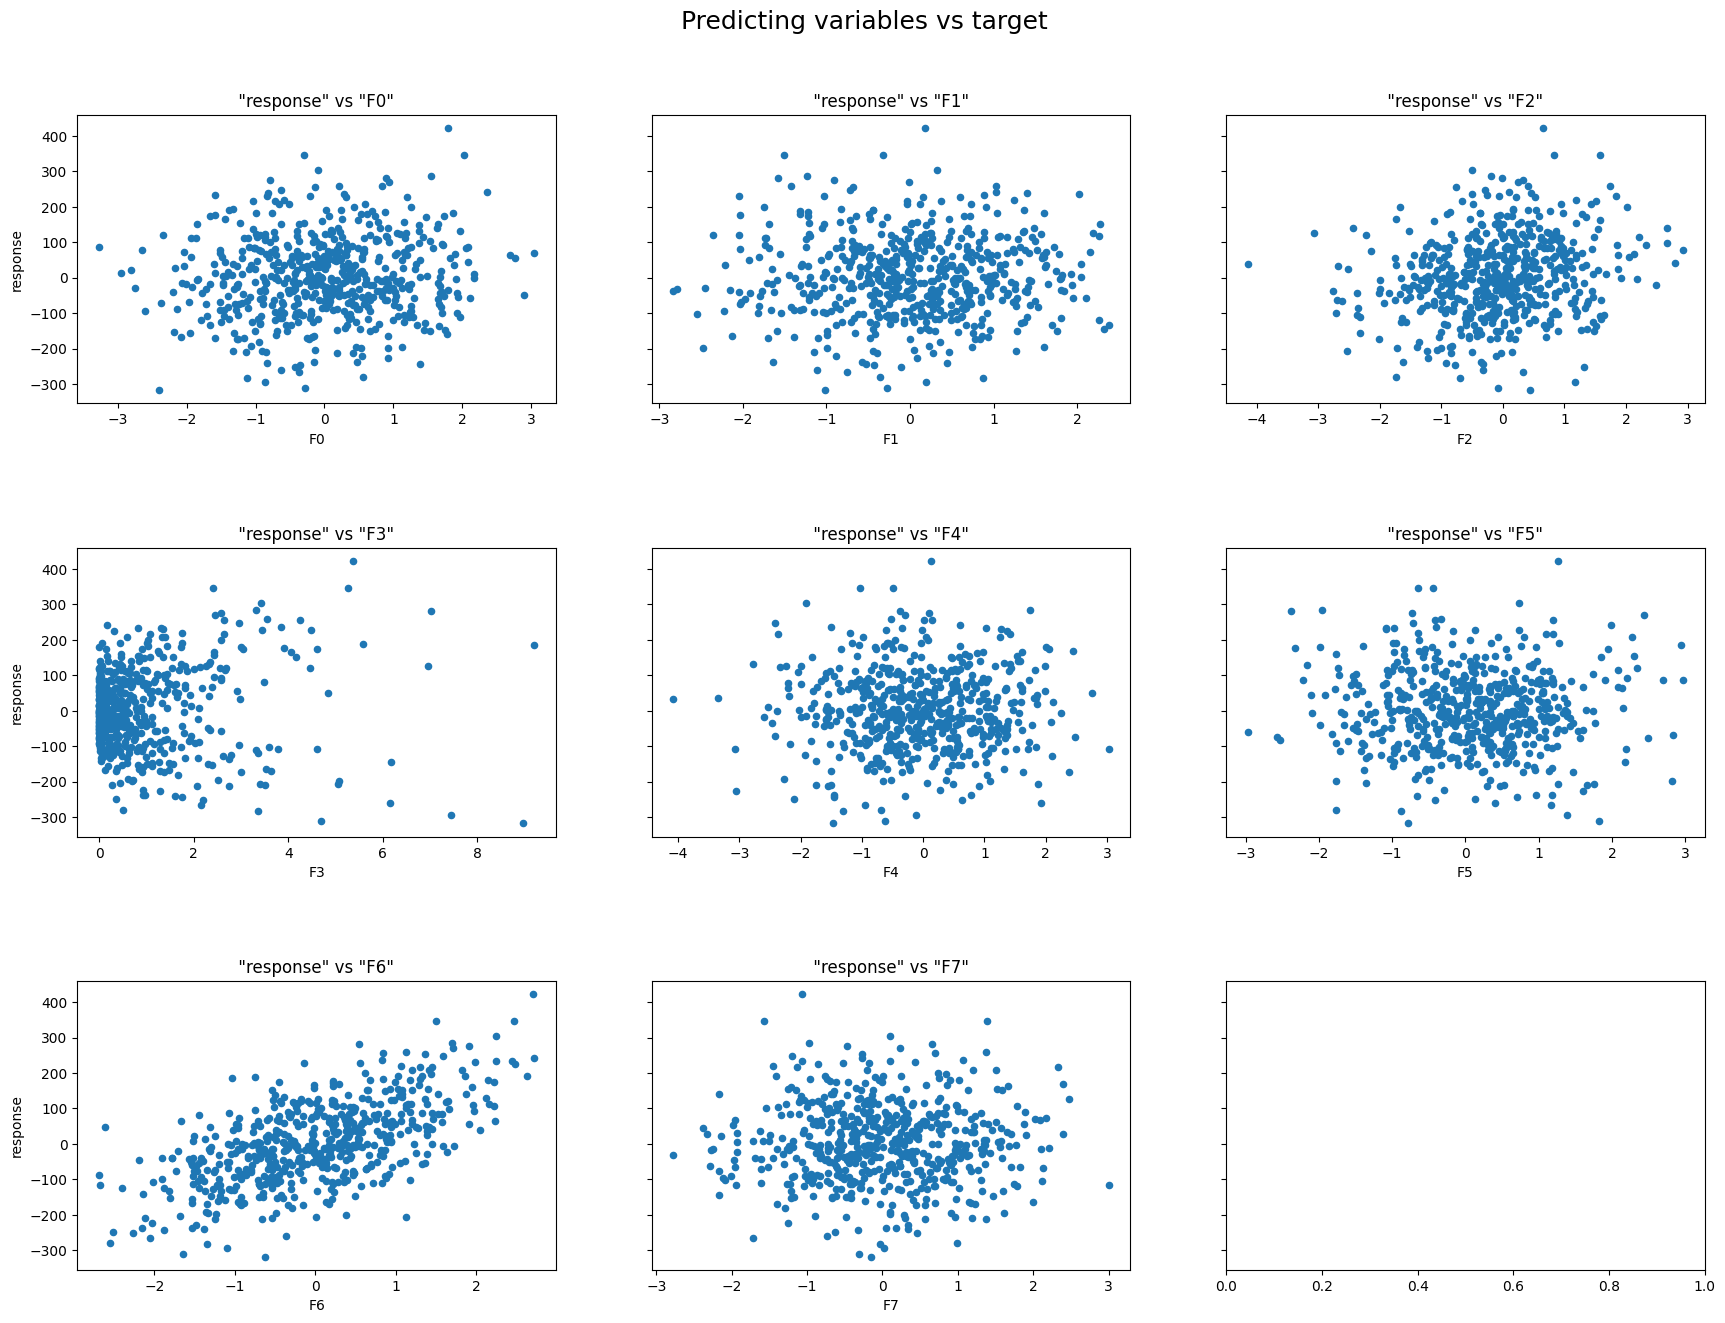

In [ ]:
ncols = 3
nrows = math.ceil((df.shape[1]-1 )/ ncols)
figwidth = ncols * 7
figheight = nrows * 5
fig , axs = plt.subplots(nrows = nrows , ncols=ncols , figsize = (figwidth,figheight), sharey=True)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle("Predicting variables vs target" , fontsize = 18 , y = 0.95)
for c, ax in zip(df.drop(target,axis=1).columns, axs.ravel()):
  df.sort_values(by=c).plot.scatter(x=c , y = target , title = ' "{}" vs "{}" '.format(target,c), ax=ax)

<Axes: >

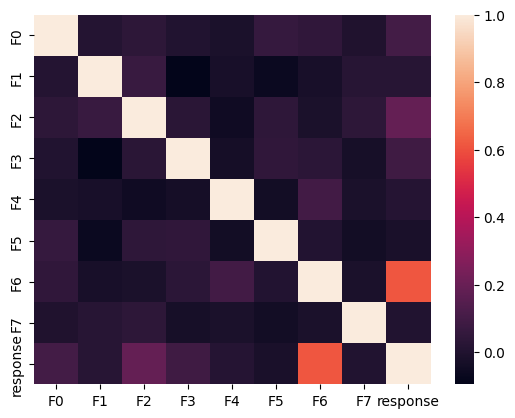

In [ ]:
sns.heatmap(df.corr())

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=random_state)

In [ ]:
print("Training and test set have {} and {} elements respectively".format(x_train.shape[0],x_test.shape[0]))

Training and test set have 399 and 171 elements respectively


for univariate we have to choose one feature and we can see f6 has the strongest relationship with target

In [ ]:
pred_var = 'F6'
x_train_r= x_train[pred_var].values.reshape(-1,1)
x_test_r= x_test[pred_var].values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_uni = linear_model.LinearRegression()
linear_uni.fit(x_train_r, y_train)
y_train_pred_uni = linear_uni.predict(x_train_r)
y_test_pred_uni = linear_uni.predict(x_test_r)


In [ ]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
linear_uni_coeff = linear_uni.coef_[0]
linear_uni_intercept = linear_uni.intercept_
linear_uni_r2_score = r2_score(y_test, y_test_pred_uni)
linear_uni_rmse = root_mean_squared_error(y_test, y_test_pred_uni)

In [ ]:
print("the root mean squared error is" , linear_uni_rmse)
print("the r2 score is" , linear_uni_r2_score)

the root mean squared error is 85.1217441119596
the r2 score is 0.33847681347897574


now we do for multivariable like all features affect


In [ ]:
from sklearn.linear_model import LinearRegression
linear_multi = linear_model.LinearRegression()
linear_multi.fit(x_train, y_train)
y_train_pred_multi = linear_multi.predict(x_train)
y_test_pred_multi = linear_multi.predict(x_test)

In [ ]:
linear_multi_coeff = linear_multi.coef_
linear_multi_intercept = linear_multi.intercept_
linear_multi_r2_score = r2_score(y_test, y_test_pred_multi)
linear_multi_rmse = root_mean_squared_error(y_test, y_test_pred_multi)

In [ ]:
print("the root mean squared error is" , linear_multi_rmse)
print("the r2 score is" , linear_multi_r2_score)

the root mean squared error is 81.10416774345711
the r2 score is 0.3994483175642216


In [ ]:
pd.DataFrame({'Variable' : x.columns , 'Coeffecients' : linear_multi.coef_})

,Variable,Coeffecients
0,F0,9.225329
1,F1,2.794846
2,F2,21.766171
3,F3,3.299594
4,F4,-5.532386
5,F5,-6.002884
6,F6,72.949625
7,F7,-2.675824


In [ ]:
results = pd.DataFrame({
    'RMSE' : [linear_uni_rmse , linear_multi_rmse],
    'R2' : [linear_uni_r2_score, linear_multi_r2_score]
    },
    index = ['Univariate' , 'Multivariate'])
results

,RMSE,R2
Univariate,85.121744,0.338477
Multivariate,81.104168,0.399448


now  we do decision tree regressor


step 1: Train an unconstrained decision tree
we will see how complex the tree is
and we get the max depth of decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=random_state)
dt.fit(x_train, y_train)


DecisionTreeRegressor(random_state=94922767)

In [ ]:
max_max_depth = dt.get_depth()
print("The maximum depth of a decision tree regressor is" , max_max_depth)

The maximum depth of a decision tree regressor is 22


step 2: now we have found the value of max depth we will gonna use it for upper bound

param_grid is a dictionary that tells GridSearchCV which hyperparameter values to try.

In [ ]:
param_grid = {'max_depth':list(range(1,max_max_depth))}

step 3: hyperparameter tuning with cross validation
For each depth:

Split training data into folds

Train a tree

Compute MSE

Average results

Select the depth with lowest error

we using gridsearchCV

In [ ]:
from sklearn import  datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
dt_gscv = GridSearchCV(dt, param_grid, scoring= 'neg_mean_squared_error')
dt_gscv.fit(x_train, y_train)



GridSearchCV(estimator=DecisionTreeRegressor(random_state=94922767),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21]},
             scoring='neg_mean_squared_error')

step 4: now we extract the optimal tree looking at the best tree and with optimal depth

In [ ]:
dt_best = dt_gscv.best_estimator_
best_max_depth = dt_best.get_depth()
print("The optimal depth of a decision tree regressor is" , best_max_depth)

The optimal depth of a decision tree regressor is 2


step 5: evaluate on test dataset

In [ ]:
y_test_dt = dt_best.predict(x_test)
rmse_dt = root_mean_squared_error(y_test, y_test_dt)
print("The RMSE of a decision tree regressor at depth {} is {}".format(best_max_depth,rmse_dt))

The RMSE of a decision tree regressor at depth 2 is 89.82720761576854


step 6:
show the visual result

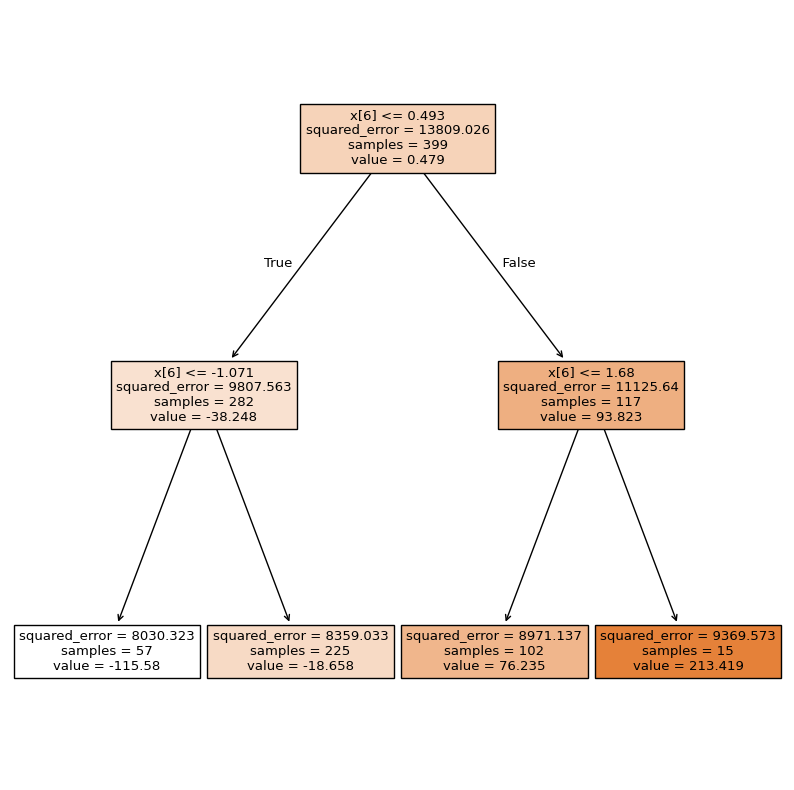

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize= (10,10))
plot_tree(dt_best, filled=True)
plt.show()

now i do for random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=random_state)


In [ ]:
param_grid_rf = {'max_depth' : list(range(1,max_max_depth))}

In [ ]:
rf_gscv=GridSearchCV(rf, param_grid=param_grid_rf, scoring='neg_mean_squared_error')
rf_gscv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=94922767),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21]},
             scoring='neg_mean_squared_error')

In [ ]:
rf_best = rf_gscv.best_estimator_
rf_max_depth = rf_best.max_depth
print("The optimal depth of a random forest regressor is" , rf_max_depth)

The optimal depth of a random forest regressor is 3


In [ ]:
y_test_pred_rf= rf_best.predict(x_test)


In [ ]:
rmse_rf = root_mean_squared_error(y_test, y_test_pred_rf)

In [ ]:
print("the rmse of rf is" , rmse_rf)

the rmse of rf is 84.70123424142166


In [ ]:
url = "/content/written-test-2025-06-30-exam-2.csv"

In [ ]:
df0 = pd.read_csv(url)

In [ ]:
df0.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.104545,0.352163,0.023372,0.003706,0.004963,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,0.053014,0.613195,-0.012447,0.029382,-0.006348,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,0.630085,0.612415,-0.004157,0.008240,0.019062,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.389900,0.000182,0.027526,0.012792,-0.021192,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.951426,0.778600,0.018246,-0.000294,-0.012900,0.004178,0.014846,1.623948


In [ ]:
df0.describe(include="all")

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000127,0.000297,-0.000421,3.378287e-01,2.521912e-01,0.000364,-0.000191,0.000553,0.000130,0.000524,0.437747
std,0.023475,0.018878,0.019124,2.952473e-01,2.877240e-01,0.017402,0.019349,0.017783,0.018999,0.025391,2.407762
min,-0.074550,-0.055749,-0.063489,9.531015e-07,6.913766e-10,-0.054694,-0.058531,-0.054578,-0.062925,-0.073059,-6.609545
25%,-0.015763,-0.012357,-0.013722,6.778294e-02,1.552023e-02,-0.011251,-0.013393,-0.011797,-0.012001,-0.018202,-1.200759
50%,0.000446,0.000269,-0.000891,2.638645e-01,1.218160e-01,0.000675,-0.000333,0.000422,-0.000858,-0.000219,0.336424
75%,0.015529,0.013924,0.012571,5.712697e-01,4.295876e-01,0.012217,0.012797,0.012697,0.012722,0.018642,2.175038
max,0.079599,0.073114,0.052593,9.996939e-01,9.988956e-01,0.053673,0.051803,0.049480,0.061867,0.081461,7.915506


In [ ]:
df0.shape

(1000, 11)

<Axes: >

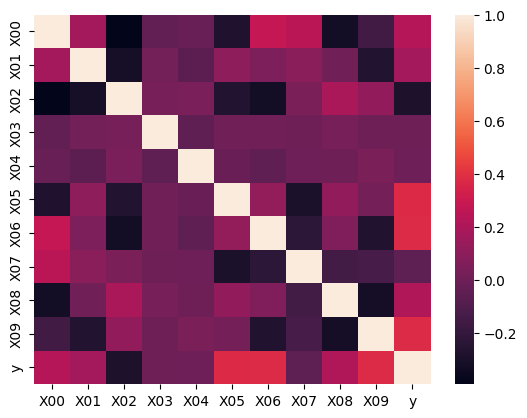

In [ ]:
import seaborn as sns
sns.heatmap(df0.corr())

In [ ]:
df0.corr()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
X00,1.000000,0.170854,-0.395194,-0.043222,-0.023247,-0.275844,0.280314,0.243400,-0.325324,-0.153477,0.227594
X01,0.170854,1.000000,-0.308342,0.015840,-0.059226,0.102338,0.047167,0.086368,0.009363,-0.268953,0.170725
X02,-0.395194,-0.308342,1.000000,0.028499,0.036766,-0.266042,-0.326706,0.043103,0.195065,0.112824,-0.287004
X03,-0.043222,0.015840,0.028499,1.000000,-0.049209,0.008271,0.011157,-0.006028,0.029519,-0.006292,-0.005415
X04,-0.023247,-0.059226,0.036766,-0.049209,1.000000,-0.018662,-0.048011,-0.002504,-0.006653,0.042886,0.002213
X05,-0.275844,0.102338,-0.266042,0.008271,-0.018662,1.000000,0.119608,-0.292621,0.115454,0.021566,0.369986
X06,0.280314,0.047167,-0.326706,0.011157,-0.048011,0.119608,1.000000,-0.228867,0.054893,-0.274311,0.376340
X07,0.243400,0.086368,0.043103,-0.006028,-0.002504,-0.292621,-0.228867,1.000000,-0.145627,-0.132451,-0.056175
X08,-0.325324,0.009363,0.195065,0.029519,-0.006653,0.115454,0.054893,-0.145627,1.000000,-0.316079,0.209655
X09,-0.153477,-0.268953,0.112824,-0.006292,0.042886,0.021566,-0.274311,-0.132451,-0.316079,1.000000,0.374650


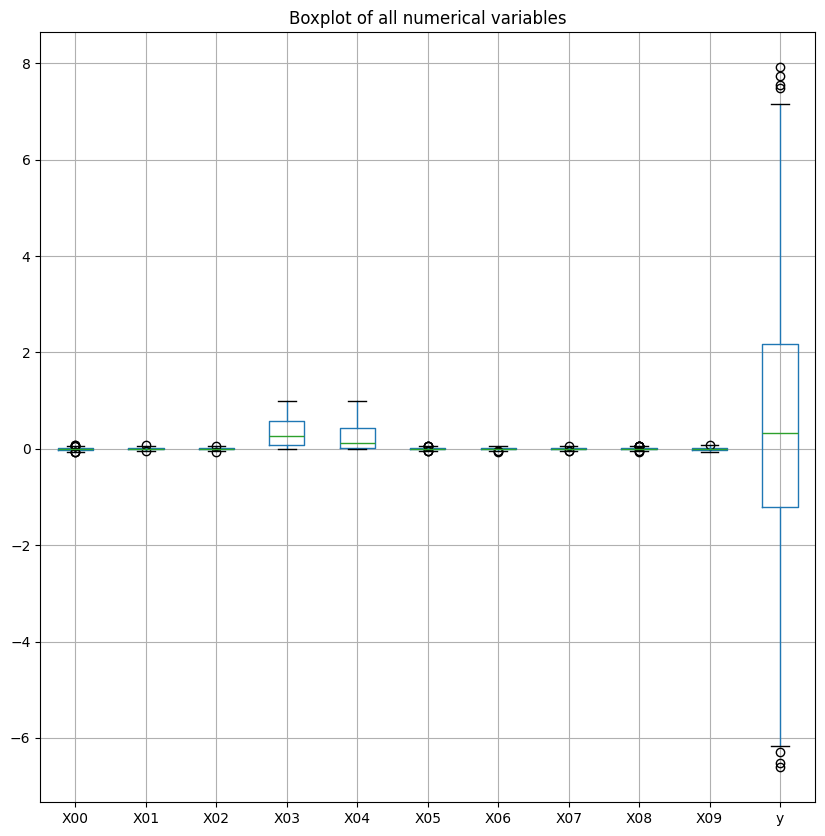

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
df0.boxplot()
plt.title("Boxplot of all numerical variables")
plt.show()


In [ ]:
df0.corr().abs()["y"]

,y
X00,0.227594
X01,0.170725
X02,0.287004
X03,0.005415
X04,0.002213
X05,0.369986
X06,0.376340
X07,0.056175
X08,0.209655
X09,0.374650


In [ ]:

X = df0.drop("y" ,axis=1)
y = df0["y"]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_multi = LinearRegression()
linear_multi.fit(X_train,y_train)
y_test_multi = linear_multi.predict(X_test)

In [ ]:
from sklearn.metrics import root_mean_squared_error
rmse_multi = root_mean_squared_error(y_test, y_test_multi)

In [ ]:
print("The root mean squared error is:" , rmse_multi)

The root mean squared error is: 0.8761183563343509


dropping the column

In [ ]:
df = df0.drop(["X03" , "X04" , "X07"], axis =1).copy()

In [ ]:
df.shape

(1000, 8)

In [ ]:
X = df.drop("y" , axis =1)
y = df["y"]

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_multi_d = LinearRegression()
linear_multi_d.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_d = linear_multi_d.predict(X_test)

In [ ]:
from sklearn.metrics import root_mean_squared_error
rmse_multi_d = root_mean_squared_error(y_test, y_pred_d)
print("The root mean squared error is:" , rmse_multi_d)

The root mean squared error is: 0.9838044848019134


In [ ]:
results = pd.DataFrame(
    {'RMSE:' : [rmse_multi , rmse_multi_d]},
    index = ["RMSE without dropping" , "RMSE with dropping"]
)
results


,RMSE:
RMSE without dropping,0.876118
RMSE with dropping,0.983804


In [ ]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, random_state=42)
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_test_dt = dt.predict(X_test)
rmse_dt = root_mean_squared_error(y_test, y_test_dt)
print("The root mean squared error is:" , rmse_dt)
print("The maximum depth for this unconstrained decision tree is " , dt.get_depth())

The root mean squared error is: 2.050581565901424
The maximum depth for this unconstrained decision tree is  20


In [ ]:
max_max_depth = dt.get_depth()

In [ ]:
param_grid = {'max_depth' : list(range(1,max_max_depth))}

In [ ]:
from sklearn.model_selection import GridSearchCV
dt_gscv= GridSearchCV(dt , param_grid=param_grid , scoring = 'neg_mean_squared_error')

dt_gscv.fit(X_train, y_train)
dt_best_gscv = dt_gscv.best_estimator_
best_max_depth = dt_best_gscv.get_depth()
print("The optimal maximum depth for the decision tree is {}".format(best_max_depth))

The optimal maximum depth for the decision tree is 7


In [ ]:
y_test_gscv = dt_best_gscv.predict(X_test)
rmse_gscv = root_mean_squared_error(y_test, y_test_gscv)
print("The root mean squared error is:" , rmse_gscv)


The root mean squared error is: 2.025814673036973


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, random_state=42
)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": list(range(1, 21))
}

dt = DecisionTreeRegressor(random_state=42)

grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5
)

# 🔴 IMPORTANT: fit ONLY on training data
grid.fit(X_train, y_train)

dt_best = grid.best_estimator_
print("Optimal max_depth:", dt_best.get_depth())


Optimal max_depth: 7


In [ ]:
from sklearn.metrics import root_mean_squared_error

y_test_pred = dt_best.predict(X_test)
rmse_optimized = root_mean_squared_error(y_test, y_test_pred)

print("Optimized Decision Tree RMSE:", rmse_optimized)


Optimized Decision Tree RMSE: 2.025814673036973
